In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind, pearsonr, spearmanr, chi2_contingency, f_oneway

In [ ]:
from google.colab import files
upload = files.upload()
data = pd.read_csv("egypt_hotels_data.csv", encoding='latin-1')

Saving egypt_hotels_data.csv to egypt_hotels_data (2).csv


# Data Collection

In [ ]:

price_columns = [
    "Rate per Night (Lowest)",
    "Rate per Night (Before Taxes and Fees)",
    "Total Rate (Lowest)",
    "Total Rate (Before Taxes and Fees)"
]

def clean_price(value):
    if isinstance(value, str):
        value = value.replace("EGP", "").replace(",", "").replace(" ", "").strip()
        try:
            return float(value)
        except ValueError:
            return None
    return value

for col in price_columns:
    data[col] = data[col].apply(clean_price)


In [ ]:
# Step 4: Fill missing values
# Fill numeric price data with median
for col in price_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing text columns with "Not Provided"
text_columns = [
    "Check-In Time", "Check-Out Time", "Amenities", "Excluded Amenities",
    "Essential Info", "Ratings Breakdown", "Reviews Breakdown"
]

for col in text_columns:
    data[col].fillna("Not Provided", inplace=True)

<ipython-input-28-708fe931709b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
# Step 5: Confirm the cleaning
print(data.info())
print(data[price_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type                                    947 non-null    object 
 1   Name                                    947 non-null    object 
 2   Latitude                                947 non-null    float64
 3   Longitude                               947 non-null    float64
 4   Check-In Time                           947 non-null    object 
 5   Check-Out Time                          947 non-null    object 
 6   Overall Rating                          947 non-null    float64
 7   Reviews                                 947 non-null    int64  
 8   Location Rating                         947 non-null    float64
 9   Amenities                               947 non-null    object 
 10  Excluded Amenities                      947 non-null    object

In [ ]:
# Display the first few rows
data.head()

,Type,Name,Latitude,Longitude,Check-In Time,Check-Out Time,Overall Rating,Reviews,Location Rating,Amenities,Excluded Amenities,Essential Info,Nearby Places,Ratings Breakdown,Reviews Breakdown,Rate per Night (Lowest),Rate per Night (Before Taxes and Fees),Total Rate (Lowest),Total Rate (Before Taxes and Fees)
0,vacation rental,Pyramids Power Inn,29.972450,31.143061,3:00 PM,12:00 PM,4.8,53,4.1,"Air conditioning, Airport shuttle, Balcony, Ki...","No beach access, No elevator, No fitness cente...","Entire house, Sleeps 6, 3 bedrooms, 3 bathroom...",Ibrahim Al Afifi Alley (Al Mansoureyya Rd.): W...,Not Provided,Not Provided,1499.0,1499.0,1499.0,1499.0
1,hotel,Best View Pyramids Hotel,29.973594,31.141980,11:00 AM,11:00 AM,4.7,4615,4.3,"Breakfast, Free Wi-Fi, Free parking, Hot tub, ...",Not Provided,Not Provided,Great Sphinx of Giza: Walking - 9 min; Ibrahim...,"5 stars: 4120 reviews, 4 stars: 127 reviews, 3...","Service - Positive: 804, Negative: 65, Neutral...",1964.0,1662.0,1964.0,1662.0
2,vacation rental,Dahab,28.510969,34.515739,3:00 PM,11:00 AM,0.0,0,3.0,"Air conditioning, Crib, Hot tub, Kitchen, Wash...","No airport shuttle, No balcony, No beach acces...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Sharm El Sheikh International Airport: Taxi - ...,Not Provided,Not Provided,1108.0,964.0,1108.0,964.0
3,vacation rental,oasis hot spring,29.189199,25.559971,12:00 PM,11:00 AM,0.0,0,3.1,"Crib, Pet-friendly, Smoke-free, Free parking","No air conditioning, No airport shuttle, No ba...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Marsa Matruh International Airport: Taxi - 3 h...,Not Provided,Not Provided,708.0,708.0,708.0,708.0
4,hotel,egypt pyramids inn,29.975123,31.141058,12:00 PM,12:00 PM,4.5,1077,4.3,"Breakfast, Free Wi-Fi, Free parking, Air condi...",Not Provided,Not Provided,Great Sphinx of Giza: Walking - 5 min; Abu Al ...,"5 stars: 841 reviews, 4 stars: 105 reviews, 3 ...","Service - Positive: 109, Negative: 19, Neutral...",2360.0,2047.0,2360.0,2047.0


In [ ]:
data.shape

(947, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type                                    947 non-null    object 
 1   Name                                    947 non-null    object 
 2   Latitude                                947 non-null    float64
 3   Longitude                               947 non-null    float64
 4   Check-In Time                           947 non-null    object 
 5   Check-Out Time                          947 non-null    object 
 6   Overall Rating                          947 non-null    float64
 7   Reviews                                 947 non-null    int64  
 8   Location Rating                         947 non-null    float64
 9   Amenities                               947 non-null    object 
 10  Excluded Amenities                      947 non-null    object

In [ ]:
#  Check count of missing values
data.isnull().sum()

,0
Type,0
Name,0
Latitude,0
Longitude,0
Check-In Time,0
Check-Out Time,0
Overall Rating,0
Reviews,0
Location Rating,0
Amenities,0


# Data Cleaning

* Outlier Removal: The data underwent a cleaning process to remove outliers, which are data points that fall significantly outside the expected range. Outliers can skew the analysis and distort the true picture.

*  Used the IQR method to deal with outliers.

*  Missing Value Handling: Missing values (also known as NaN values) were addressed.
*  Common methods include removing rows with missing values.



In [ ]:
data.dropna(inplace=True)  # Drop all rows with any NA values

In [ ]:
#  Check again for missing values
data.isnull().sum()

,0
Type,0
Name,0
Latitude,0
Longitude,0
Check-In Time,0
Check-Out Time,0
Overall Rating,0
Reviews,0
Location Rating,0
Amenities,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 946
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type                                    946 non-null    object 
 1   Name                                    946 non-null    object 
 2   Latitude                                946 non-null    float64
 3   Longitude                               946 non-null    float64
 4   Check-In Time                           946 non-null    object 
 5   Check-Out Time                          946 non-null    object 
 6   Overall Rating                          946 non-null    float64
 7   Reviews                                 946 non-null    int64  
 8   Location Rating                         946 non-null    float64
 9   Amenities                               946 non-null    object 
 10  Excluded Amenities                      946 non-null    object 
 11

In [ ]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 9 numerical variables

The numerical variables are :

 ['Latitude', 'Longitude', 'Overall Rating', 'Reviews', 'Location Rating', 'Rate per Night (Lowest)', 'Rate per Night (Before Taxes and Fees)', 'Total Rate (Lowest)', 'Total Rate (Before Taxes and Fees)']


In [ ]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 10 categorical variables

The categorical variables are :

 ['Type', 'Name', 'Check-In Time', 'Check-Out Time', 'Amenities', 'Excluded Amenities', 'Essential Info', 'Nearby Places', 'Ratings Breakdown', 'Reviews Breakdown']


In [ ]:
data.describe()

,Latitude,Longitude,Overall Rating,Reviews,Location Rating,Rate per Night (Lowest),Rate per Night (Before Taxes and Fees),Total Rate (Lowest),Total Rate (Before Taxes and Fees)
count,946.000000,946.000000,946.000000,946.00000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,28.691605,31.858695,3.713081,1444.17019,3.620719,3868.086681,3097.762156,3868.086681,3097.762156
std,2.077075,1.743753,1.578329,4576.35026,0.714412,7585.146719,6146.248350,7585.146719,6146.248350
min,22.337232,25.466989,0.000000,0.00000,1.600000,188.000000,73.000000,188.000000,73.000000
25%,27.221438,31.142294,3.600000,6.00000,3.100000,949.000000,777.000000,949.000000,777.000000
50%,29.971074,31.333634,4.300000,34.00000,3.700000,1498.000000,1168.000000,1498.000000,1168.000000
75%,30.048015,32.891264,4.700000,258.75000,4.200000,3218.750000,2570.000000,3218.750000,2570.000000
max,31.524534,34.977121,5.000000,44350.00000,4.800000,67163.000000,58403.000000,67163.000000,58403.000000


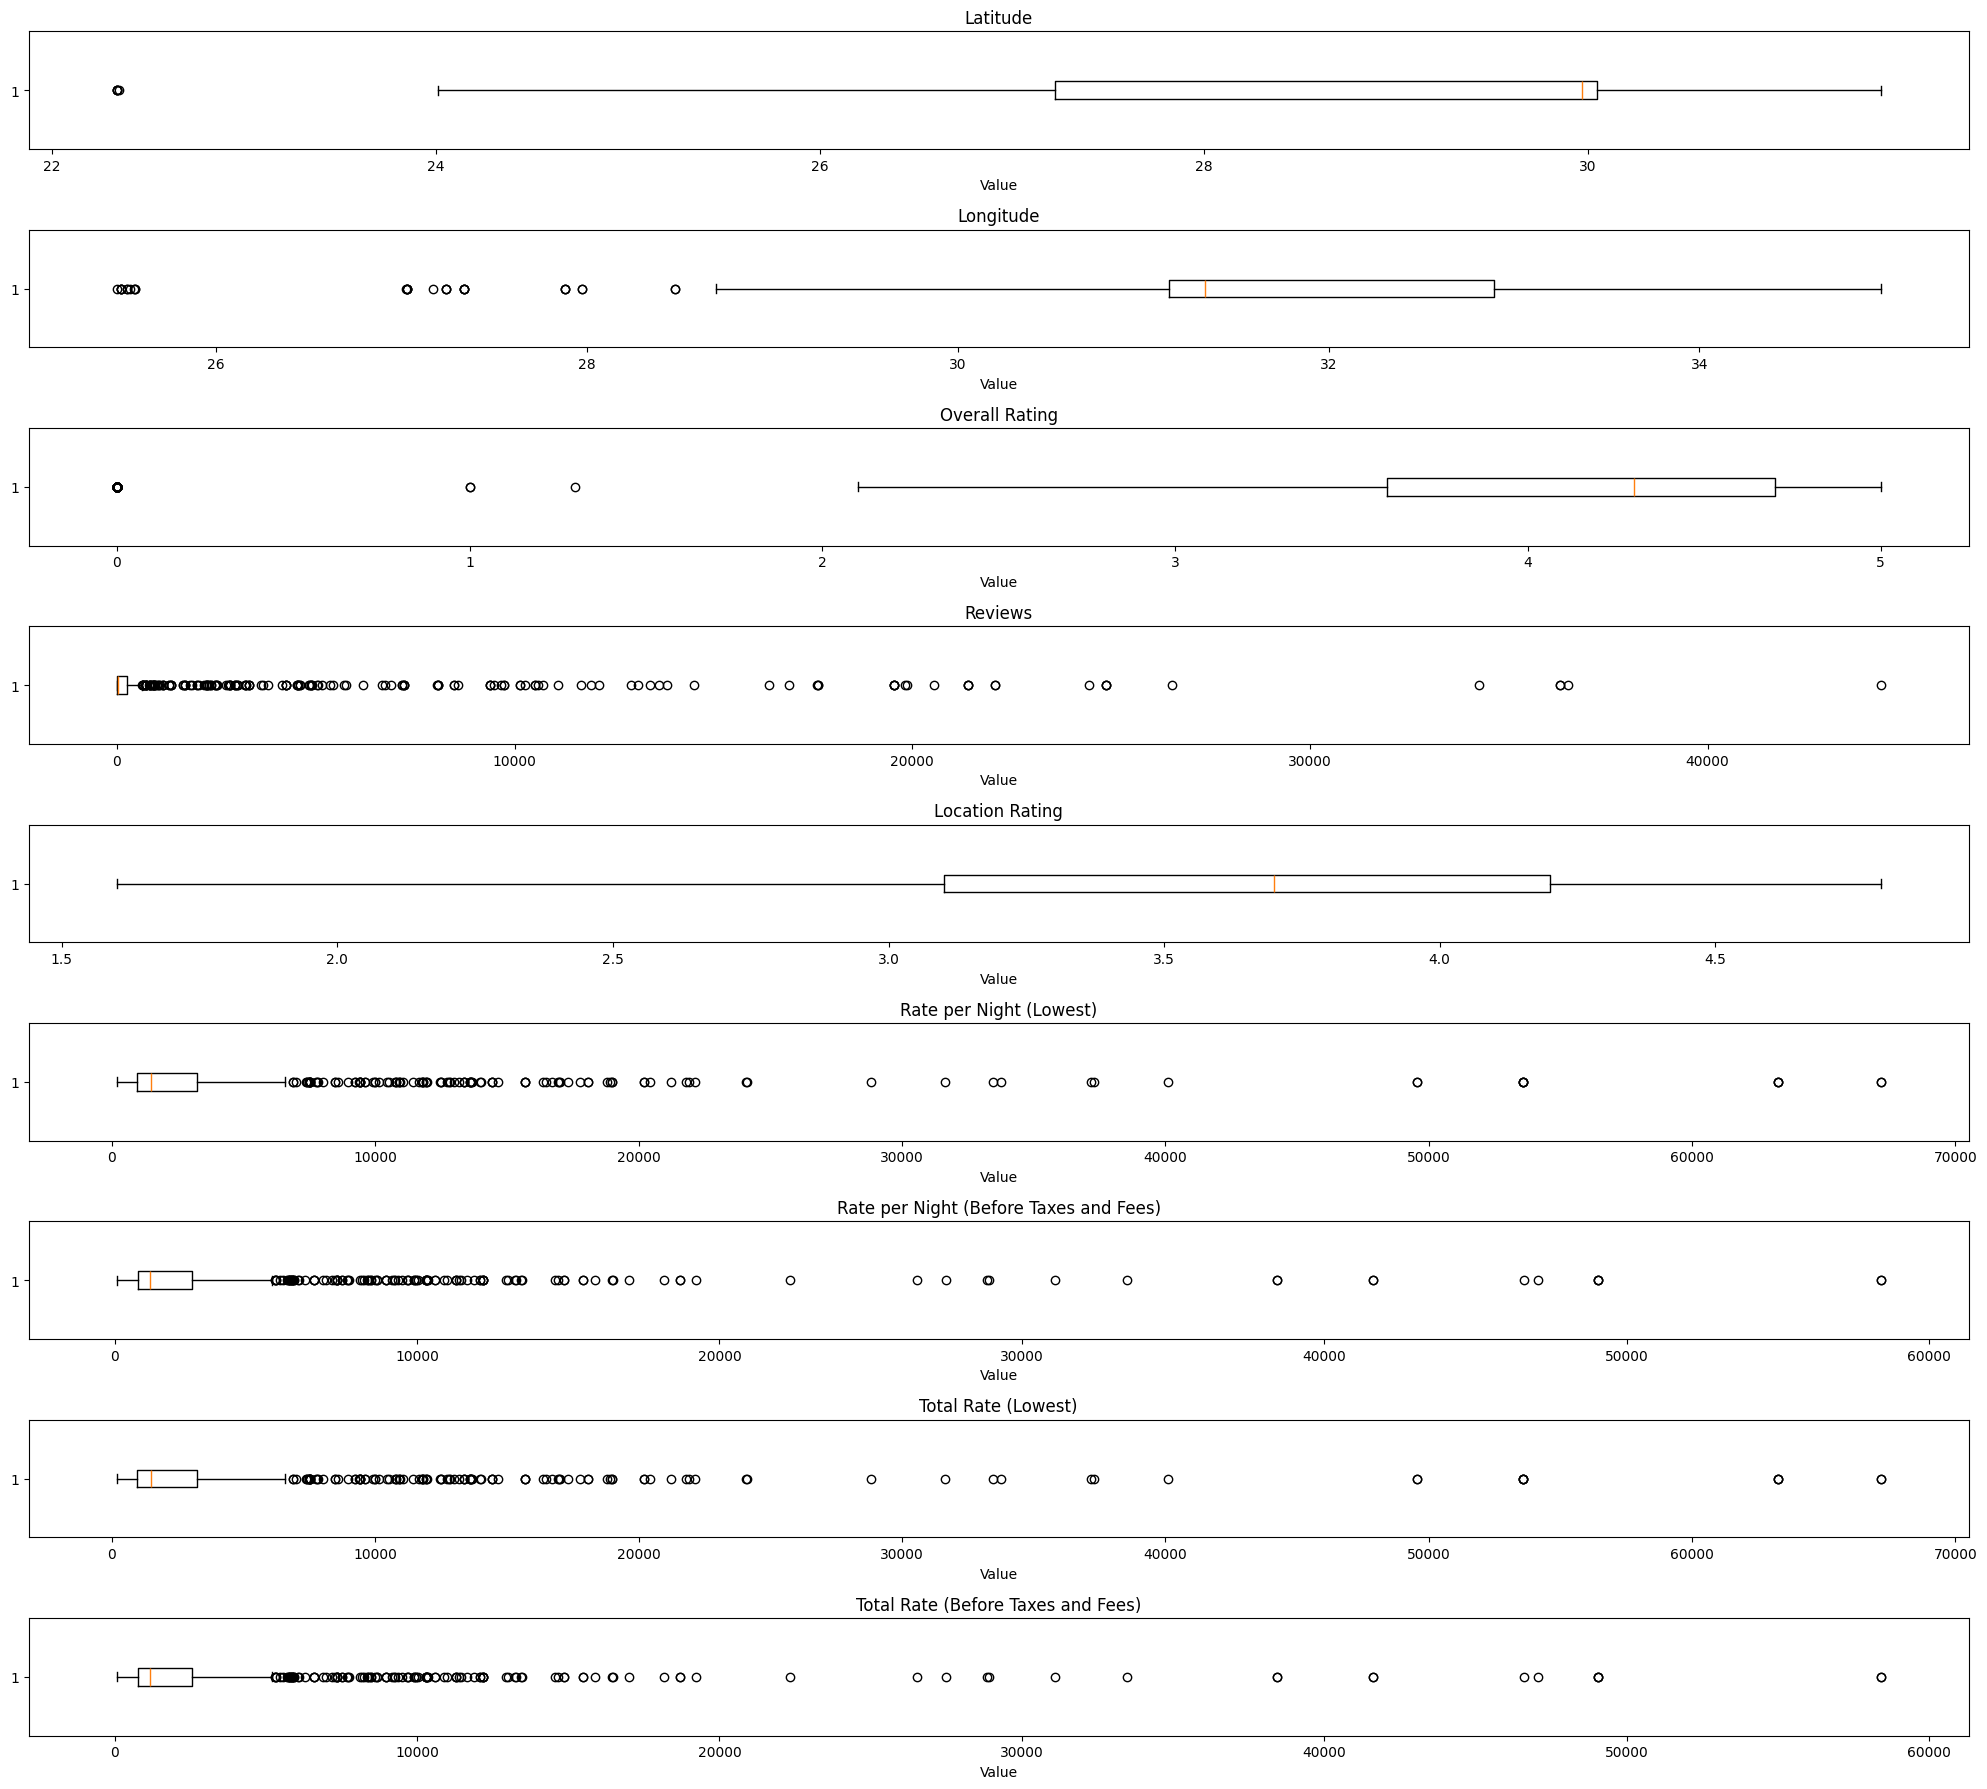

In [ ]:
# Box Plot (before removing outliers)
numeric_columns = data.select_dtypes(include='number').columns

# Create box plots for all numeric columns
plt.figure(figsize=(20, len(numeric_columns) * 2))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
columns_to_analyze = data.select_dtypes(include='number').columns

# Apply the IQR method to cap outliers
for column in columns_to_analyze:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below lower_bound
    data.loc[data[column] < lower_bound, column] = lower_bound
    # Cap values above upper_bound
    data.loc[data[column] > upper_bound, column] = upper_bound

# Display first few rows
data.head()

<ipython-input-45-ae795c3cfe95>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-373.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound


,Type,Name,Latitude,Longitude,Check-In Time,Check-Out Time,Overall Rating,Reviews,Location Rating,Amenities,Excluded Amenities,Essential Info,Nearby Places,Ratings Breakdown,Reviews Breakdown,Rate per Night (Lowest),Rate per Night (Before Taxes and Fees),Total Rate (Lowest),Total Rate (Before Taxes and Fees)
0,vacation rental,Pyramids Power Inn,29.972450,31.143061,3:00 PM,12:00 PM,4.80,53.000,4.1,"Air conditioning, Airport shuttle, Balcony, Ki...","No beach access, No elevator, No fitness cente...","Entire house, Sleeps 6, 3 bedrooms, 3 bathroom...",Ibrahim Al Afifi Alley (Al Mansoureyya Rd.): W...,Not Provided,Not Provided,1499.0,1499.0,1499.0,1499.0
1,hotel,Best View Pyramids Hotel,29.973594,31.141980,11:00 AM,11:00 AM,4.70,637.875,4.3,"Breakfast, Free Wi-Fi, Free parking, Hot tub, ...",Not Provided,Not Provided,Great Sphinx of Giza: Walking - 9 min; Ibrahim...,"5 stars: 4120 reviews, 4 stars: 127 reviews, 3...","Service - Positive: 804, Negative: 65, Neutral...",1964.0,1662.0,1964.0,1662.0
2,vacation rental,Dahab,28.510969,34.515739,3:00 PM,11:00 AM,1.95,0.000,3.0,"Air conditioning, Crib, Hot tub, Kitchen, Wash...","No airport shuttle, No balcony, No beach acces...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Sharm El Sheikh International Airport: Taxi - ...,Not Provided,Not Provided,1108.0,964.0,1108.0,964.0
3,vacation rental,oasis hot spring,29.189199,28.518839,12:00 PM,11:00 AM,1.95,0.000,3.1,"Crib, Pet-friendly, Smoke-free, Free parking","No air conditioning, No airport shuttle, No ba...","Entire apartment, Sleeps 2, 1 bedroom, 1 bathr...",Marsa Matruh International Airport: Taxi - 3 h...,Not Provided,Not Provided,708.0,708.0,708.0,708.0
4,hotel,egypt pyramids inn,29.975123,31.141058,12:00 PM,12:00 PM,4.50,637.875,4.3,"Breakfast, Free Wi-Fi, Free parking, Air condi...",Not Provided,Not Provided,Great Sphinx of Giza: Walking - 5 min; Abu Al ...,"5 stars: 841 reviews, 4 stars: 105 reviews, 3 ...","Service - Positive: 109, Negative: 19, Neutral...",2360.0,2047.0,2360.0,2047.0


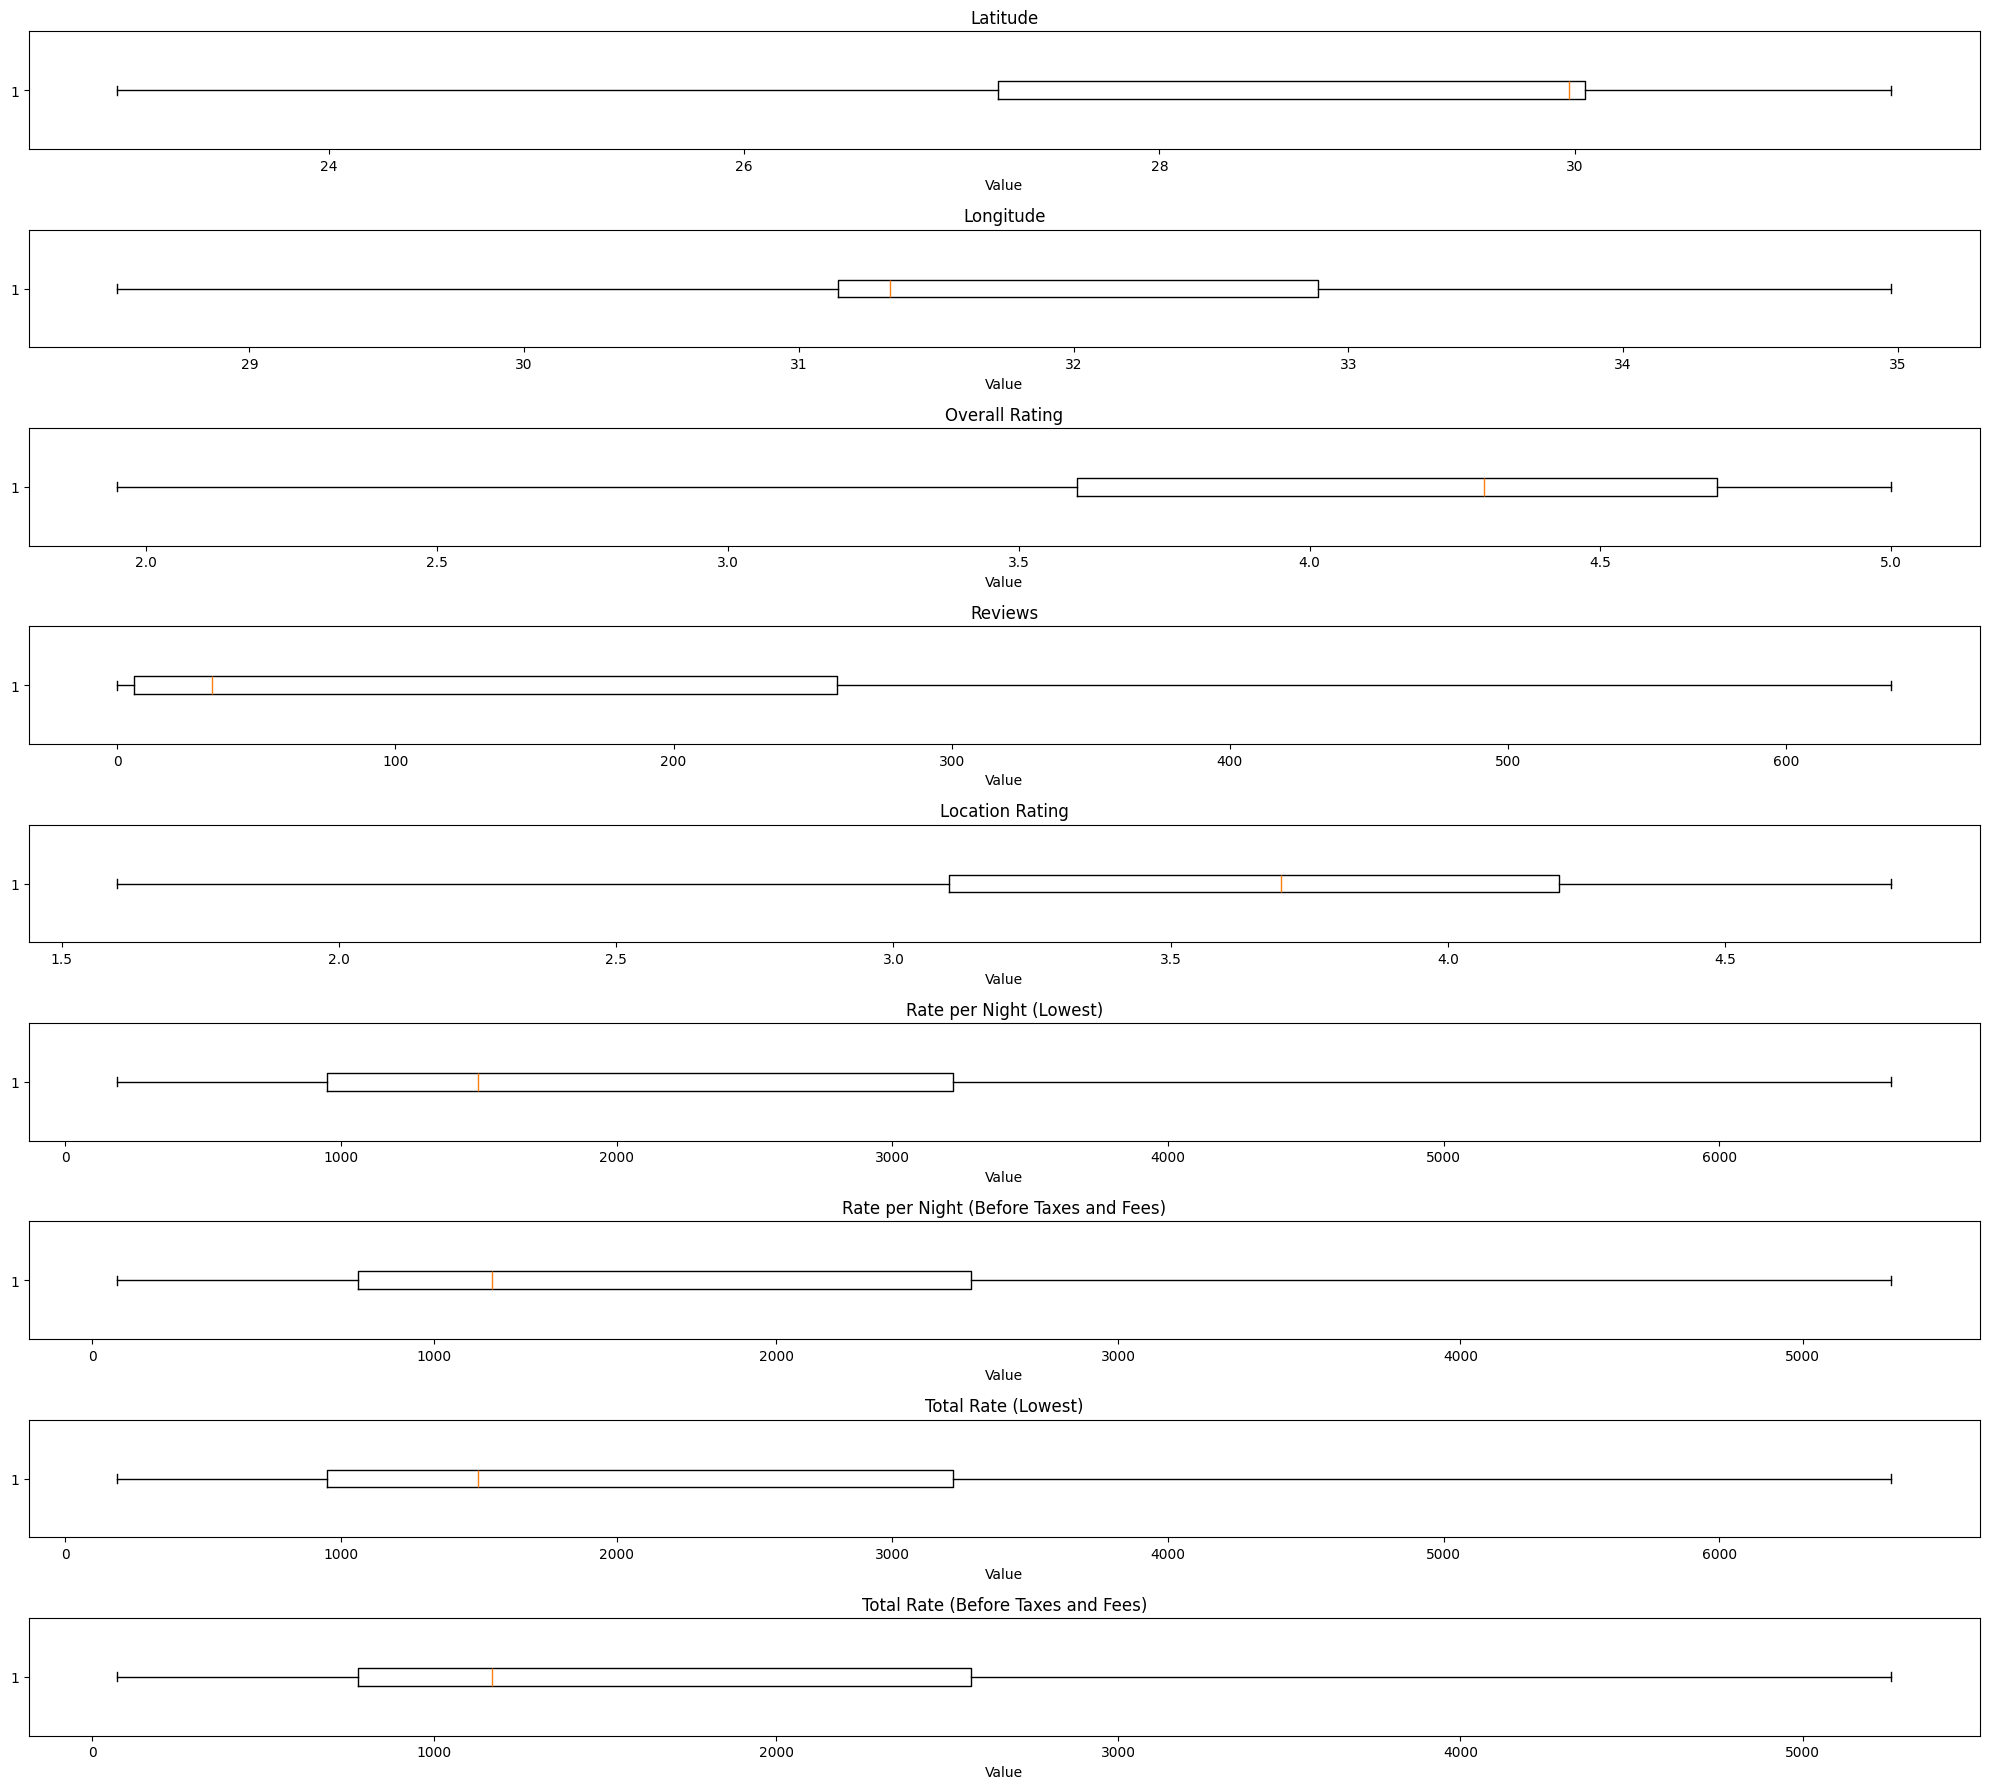

In [ ]:
# Box Plot (after removing outliers)
numeric_columns = data.select_dtypes(include='number').columns

# Create box plots for all numeric columns
plt.figure(figsize=(20, len(numeric_columns) * 2))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

# Correlation Analysis


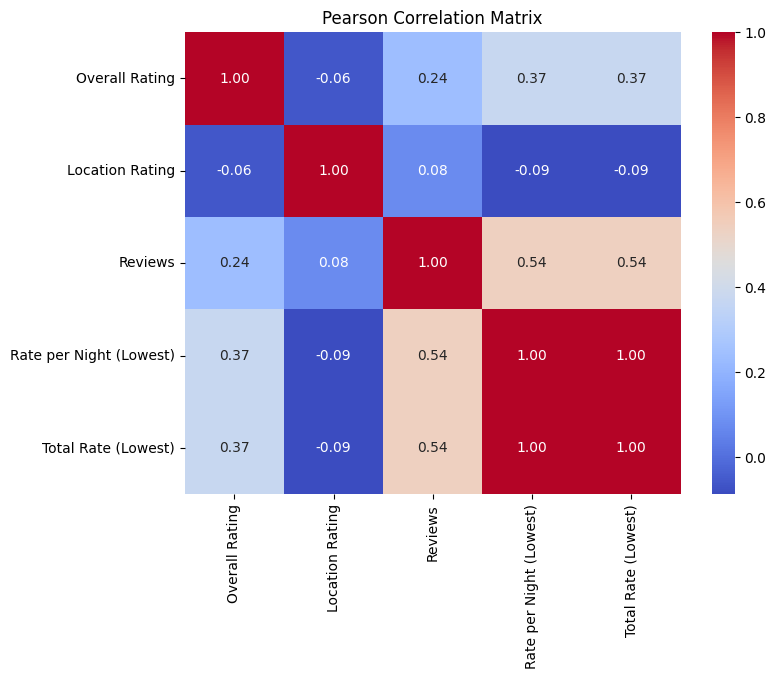

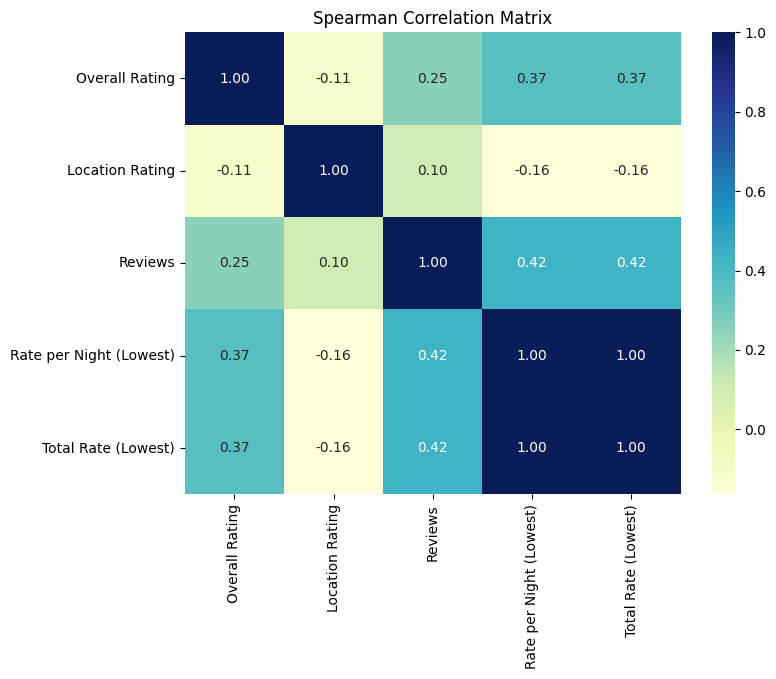

In [ ]:
# Compute correlations
corr_cols = ["Overall Rating", "Location Rating", "Reviews", "Rate per Night (Lowest)", "Total Rate (Lowest)"]
corr_matrix = data[corr_cols].corr(method='pearson')

# Pearson Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Spearman correlation (rank-based, robust to outliers)
spearman_corr = data[corr_cols].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

# Hypothesis Testing


In [ ]:
# Hotel vs Rental: Ratings
hotel_ratings = data[data["Type"] == "hotel"]["Overall Rating"]
rental_ratings = data[data["Type"] == "vacation rental"]["Overall Rating"]
t1 = ttest_ind(hotel_ratings, rental_ratings, equal_var=False)

# Hotel vs Rental: Price
hotel_prices = data[data["Type"] == "hotel"]["Rate per Night (Lowest)"]
rental_prices = data[data["Type"] == "vacation rental"]["Rate per Night (Lowest)"]
t2 = ttest_ind(hotel_prices, rental_prices, equal_var=False)

# Popularity: Low vs High Review Count
median_reviews = data["Reviews"].median()
low_reviews = data[data["Reviews"] <= median_reviews]["Overall Rating"]
high_reviews = data[data["Reviews"] > median_reviews]["Overall Rating"]
t3 = ttest_ind(high_reviews, low_reviews, equal_var=False)

# Results
print("T-test 1: Hotel vs Rental Ratings ->", t1)
print("T-test 2: Hotel vs Rental Prices ->", t2)
print("T-test 3: High vs Low Reviews (Ratings) ->", t3)

T-test 1: Hotel vs Rental Ratings -> TtestResult(statistic=np.float64(9.333058242535715), pvalue=np.float64(1.2375171327322633e-18), df=np.float64(348.3853778405738))
T-test 2: Hotel vs Rental Prices -> TtestResult(statistic=np.float64(1.5760088936766932), pvalue=np.float64(0.11556096622995184), df=np.float64(588.6853024543042))
T-test 3: High vs Low Reviews (Ratings) -> TtestResult(statistic=np.float64(9.290686556786461), pvalue=np.float64(2.5970286649802954e-19), df=np.float64(616.822281031153))


# Data Visualization

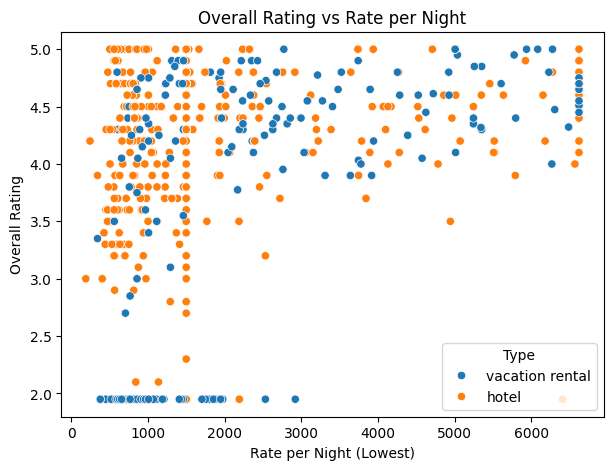

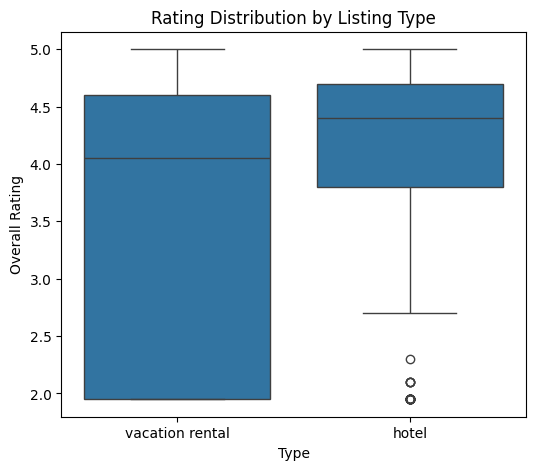

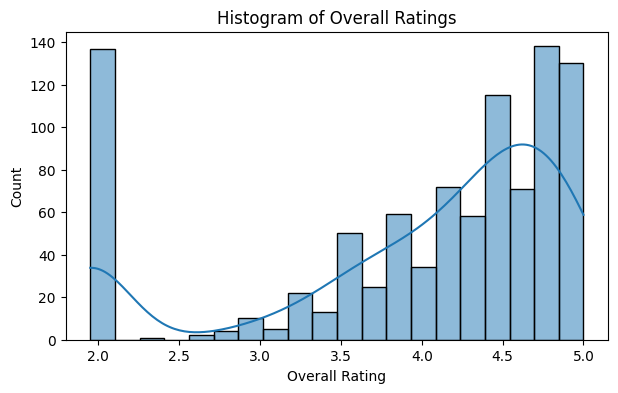

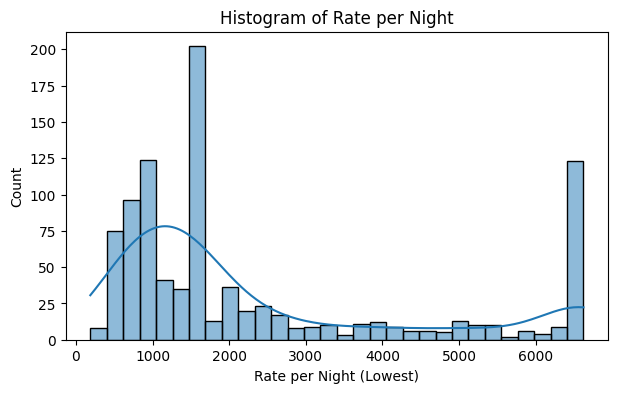

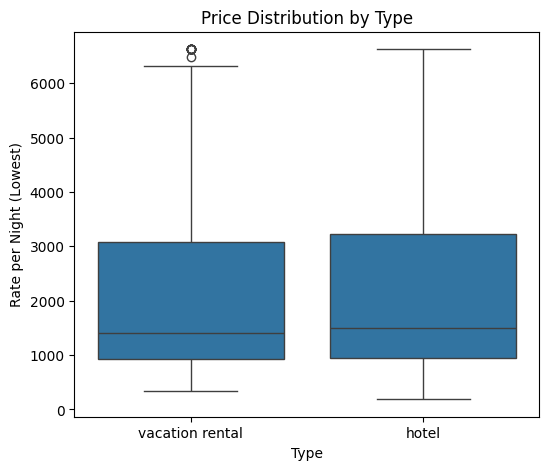

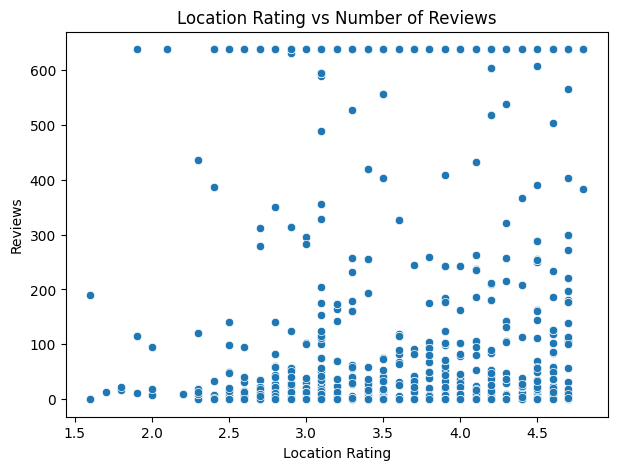

In [ ]:
# Scatter: Rating vs Price
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x="Rate per Night (Lowest)", y="Overall Rating", hue="Type")
plt.title("Overall Rating vs Rate per Night")
plt.show()

# Boxplot: Ratings by Type
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x="Type", y="Overall Rating")
plt.title("Rating Distribution by Listing Type")
plt.show()

# Histogram: Ratings
plt.figure(figsize=(7, 4))
sns.histplot(data["Overall Rating"], bins=20, kde=True)
plt.title("Histogram of Overall Ratings")
plt.show()

# Histogram: Prices
plt.figure(figsize=(7, 4))
sns.histplot(data["Rate per Night (Lowest)"], bins=30, kde=True)
plt.title("Histogram of Rate per Night")
plt.show()

# Boxplot: Price by Type
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x="Type", y="Rate per Night (Lowest)")
plt.title("Price Distribution by Type")
plt.show()

# Scatter: Location Rating vs Reviews
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x="Location Rating", y="Reviews")
plt.title("Location Rating vs Number of Reviews")
plt.show()

In [ ]:
# Drop entries without lat/lon
map_df = data.dropna(subset=["Latitude", "Longitude"]) # Changed data_clean to data

# Interactive map of listings
fig = px.scatter_mapbox(
    map_df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Name",
    hover_data=["Type", "Overall Rating", "Rate per Night (Lowest)"], # Changed "Rate per Night" to "Rate per Night (Lowest)"
    color="Overall Rating",
    size="Rate per Night (Lowest)", # Changed "Rate per Night" to "Rate per Night (Lowest)"
    zoom=4.5,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Hotel & Rental Locations in Egypt")
fig.show()